In [1]:
import import_ipynb

from Data_processing import *

importing Jupyter notebook from Data_processing.ipynb
importing Jupyter notebook from Midi_processing.ipynb


## These will be the datasets to be used for our network

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
torch.set_printoptions(precision=10)

### Divide data into batches of multiple sequences

In [4]:
batched_sequences = 10

def batch_sequences(batched_sequences, batch_size, note_inputs, note_targets, velocity_inputs, velocity_targets, time_inputs, time_targets):
    
    '''
    At this point our data is organized as stacked sequences and has 3D shape.
    For example shape = (3, 8, 128) means that our data contains 3 sequences, each sequence consisting of 8 inputs, 
    each input consisting of 128 elements.
    
    This function reshapes the dataset, so that it contains batches of multiple sequences.
    To do that it firstly makes sure that the number of data rows can be perfectly divided by the number of batched_sequences
    we have set.
    
    Arguments:
        batched_sequences: integer
        batch_size: integer we already know, which is essentially the length of each sequence
        input and target np.array datasets that we already have available
    
    Output:
        Reshaped input and target np.array datasets with batched sequences for note, velocity and time respectively
        Their shape is 4D
    '''
    
#     zeros_note = torch.zeros(note_inputs[0].shape).reshape(1,batch_size,-1)
#     zeros_velocity_time = torch.zeros(time_inputs[0].shape).reshape(1,batch_size,-1)

    while note_inputs.shape[0]%batched_sequences != 0 :
        
        #### while current dataset rows are not perfectly divided by the number of batched sequences we wish,
        #### an element is popped out from each array
        
        note_inputs = np.delete(note_inputs, note_inputs.shape[0]-1, 0)
        note_targets = np.delete(note_targets, note_targets.shape[0]-1, 0)
#         note_inputs = torch.cat((note_inputs, zeros_note), 0)
#         note_targets = torch.cat((note_targets, zeros_note), 0)
            
        velocity_inputs = np.delete(velocity_inputs, velocity_inputs.shape[0]-1, 0)
        velocity_targets = np.delete(velocity_targets, velocity_targets.shape[0]-1, 0)
#         velocity_inputs = torch.cat((velocity_inputs, zeros_velocity_time), 0)
#         velocity_targets = torch.cat((velocity_targets, zeros_velocity_time), 0)
        
        time_inputs = np.delete(time_inputs, time_inputs.shape[0]-1, 0)
        time_targets = np.delete(time_targets, time_targets.shape[0]-1, 0)
    
#         time_inputs = torch.cat((time_inputs, zeros_velocity_time), 0)
#         time_targets = torch.cat((time_targets, zeros_velocity_time), 0)
        print (note_inputs.shape[0])
    
    note_inputs = note_inputs.reshape(-1, batched_sequences, batch_size, 128)
    note_targets = note_targets.reshape(-1, batched_sequences, batch_size, 128)
    
    velocity_inputs = velocity_inputs.reshape(-1, batched_sequences, batch_size, 1)
    velocity_targets = velocity_targets.reshape(-1, batched_sequences, batch_size, 1)
    
    time_inputs = time_inputs.reshape(-1, batched_sequences, batch_size, 1)
    time_targets = time_targets.reshape(-1, batched_sequences, batch_size, 1)
    
    return note_inputs, note_targets, velocity_inputs, velocity_targets, time_inputs, time_targets

In [5]:
note_inputs, note_targets, velocity_inputs, velocity_targets, time_inputs, time_targets = batch_sequences(batched_sequences, batch_size, note_inputs_batched, note_targets_batched,velocity_inputs_transformed_batched, velocity_targets_transformed_batched, time_inputs_transformed_batched, time_targets_transformed_batched)

#### Notes input and target data

In [6]:
note_inputs_data = torch.Tensor(note_inputs)
note_targets_data = torch.Tensor(note_targets)

print (note_inputs_data.shape)
print (note_targets_data.shape)

print (f'\nFor note data we have {note_inputs_data.shape[0]} batches, with {note_inputs_data.shape[1]} batched sequences of {note_inputs_data.shape[2]} inputs and input size equal to {note_inputs_data.shape[3]}')

torch.Size([20389, 10, 8, 128])
torch.Size([20389, 10, 8, 128])

For note data we have 20389 batches, with 10 batched sequences of 8 inputs and input size equal to 128


#### Velocity input and target data

In [7]:
velocity_inputs_data = torch.Tensor(velocity_inputs)
velocity_targets_data = torch.Tensor(velocity_targets)

print (velocity_inputs_data.shape)
print (velocity_targets_data.shape)

print (f'\nFor velocity data we have {velocity_inputs_data.shape[0]} batches, with {velocity_inputs_data.shape[1]} batched sequences of {velocity_inputs_data.shape[2]} inputs and input size equal to {velocity_inputs_data.shape[3]}')

torch.Size([20389, 10, 8, 1])
torch.Size([20389, 10, 8, 1])

For velocity data we have 20389 batches, with 10 batched sequences of 8 inputs and input size equal to 1


#### Time input and target data

In [8]:
time_inputs_data = torch.Tensor(time_inputs)
time_targets_data = torch.Tensor(time_targets)

print (time_inputs_data.shape)
print (time_targets_data.shape)

print (f'\nFor time data we have {time_inputs_data.shape[0]} batches, with {time_inputs_data.shape[1]} batched sequences of {time_inputs_data.shape[2]} inputs and input size equal to {time_inputs_data.shape[3]}')

torch.Size([20389, 10, 8, 1])
torch.Size([20389, 10, 8, 1])

For time data we have 20389 batches, with 10 batched sequences of 8 inputs and input size equal to 1


#### Dividing data to training and validation set

In [9]:
training_factor = 0.6
validation_factor = 0.4
# test_factor = 0.1

training_len = round(len(note_inputs_data)*training_factor)
validation_len = round(len(note_inputs_data)*validation_factor)
# test_len = round(len(note_inputs_data)*test_factor)

In [10]:
# note, velocity and time training sets
note_inputs_data_training = note_inputs_data[:training_len]
note_targets_data_training = note_targets_data[:training_len]
velocity_inputs_data_training = velocity_inputs_data[:training_len]
velocity_targets_data_training = velocity_targets_data[:training_len]
time_inputs_data_training = time_inputs_data[:training_len]
time_targets_data_training = time_targets_data[:training_len]

# note, velocity and time validation sets
note_inputs_data_validation = note_inputs_data[training_len:]
note_targets_data_validation = note_targets_data[training_len:]
velocity_inputs_data_validation = velocity_inputs_data[training_len:]
velocity_targets_data_validation = velocity_targets_data[training_len:]
time_inputs_data_validation = time_inputs_data[training_len:]
time_targets_data_validation = time_targets_data[training_len:]

# note, velocity and time test sets
# note_inputs_data_test = note_inputs_data[training_len+validation_len:]
# note_targets_data_test = note_targets_data[training_len+validation_len:]
# velocity_inputs_data_test = velocity_inputs_data[training_len+validation_len:]
# velocity_targets_data_test = velocity_targets_data[training_len+validation_len:]
# time_inputs_data_test = time_inputs_data[training_len+validation_len:]
# time_targets_data_test = time_targets_data[training_len+validation_len:]

## DeepMusicNet build

#### Network Parameters

In [11]:
# first layer
input_dim_notes = 128
input_dim_velocity = 1
input_dim_time = 1

hidden_dim = 80

# 2nd layer
concat_lstm_hidden_dim = 80

# 3rd layer
linear_hidden_dim = 100

# 4th layer
second_linear_hidden_dim = 40

batch_size = batch_size
seq_len = batch_size

In [12]:
class DeepMusicNet(nn.Module):
    
    def __init__(self, input_dim_notes, input_dim_velocity, input_dim_time, hidden_dim, concat_lstm_hidden_dim, linear_hidden_dim):
        super(DeepMusicNet, self).__init__()
        
        # first layer (consists of three parallel lstms)
            # lstm layer with sequence of one_hot_encoded notes as inputs, input.shape = (num_batches, batch_size, 128)
        self.note_lstm = nn.LSTM(input_dim_notes, hidden_dim, 1, batch_first=True)
        
            # lstm layer with standardized velocity values as input, input.shape = (num_batches, batch_size, 1)
        self.velocity_lstm = nn.LSTM(input_dim_velocity, hidden_dim, 1, batch_first=True)
        
            # lstm layer with sequence of time values as input, input.shape = (num_batches, batch_size, 1)
        self.time_lstm = nn.LSTM(input_dim_time, hidden_dim, 1, batch_first=True)
        
        # second layer
        concat_input_size = 3*hidden_dim
        self.concat_lstm = nn.LSTM(concat_input_size, concat_lstm_hidden_dim, 1, batch_first = True)
        
        # third layer
        self.linear = nn.Linear(concat_lstm_hidden_dim, linear_hidden_dim)
        
        # fourth layer
        self.second_linear = nn.Linear(linear_hidden_dim, second_linear_hidden_dim)
        
        # fifth layer
        self.linear_note = nn.Linear(second_linear_hidden_dim, input_dim_notes)
        self.linear_velocity = nn.Linear(second_linear_hidden_dim, input_dim_velocity)
        self.linear_time = nn.Linear(second_linear_hidden_dim, input_dim_time)
        
#         self.dropout = nn.Dropout(p=0.5)
        
    
    def forward(self, in_note, in_velocity, in_time):
        # first layer: 3 parallel lstms
            # start with the first 3 lstms
        out_note, (hidden_note, cell_note) = self.note_lstm(in_note)
        out_velocity, (hidden_velocity, cell_velocity) = self.velocity_lstm(in_velocity)
        out_time, (hidden_time, cell_time) = self.time_lstm(in_time)
        
        # second layer: one lstm
            # concatenate the outputs of the three previous lstms to create the input for the next lstm
        concat_lstm_input =  torch.cat((out_note, out_velocity, out_time), 2)
        out, (hidden, cell) = self.concat_lstm(concat_lstm_input)
        
        # third layer: Linear
        out = self.linear(out)
        out = torch.tanh(out)
        
        # fourth layer
        out = torch.tanh(self.second_linear(out))
        
        # fifth layer: break it down to three outputs
        out_note = self.linear_note(out)
        out_velocity = self.linear_velocity(out)
        out_time = self.linear_time(out)
        
        return out_note, out_velocity, out_time

#### Instantiate network and enable cuda if it exists

In [13]:
musicNet = DeepMusicNet(input_dim_notes, input_dim_velocity, input_dim_time, hidden_dim, concat_lstm_hidden_dim, linear_hidden_dim)

if torch.cuda.is_available():
    print ('### Enabling cuda for Network ###\n')
    musicNet.cuda()

print (musicNet)

### Enabling cuda for Network ###

DeepMusicNet(
  (note_lstm): LSTM(128, 80, batch_first=True)
  (velocity_lstm): LSTM(1, 80, batch_first=True)
  (time_lstm): LSTM(1, 80, batch_first=True)
  (concat_lstm): LSTM(240, 80, batch_first=True)
  (linear): Linear(in_features=80, out_features=100, bias=True)
  (second_linear): Linear(in_features=100, out_features=40, bias=True)
  (linear_note): Linear(in_features=40, out_features=128, bias=True)
  (linear_velocity): Linear(in_features=40, out_features=1, bias=True)
  (linear_time): Linear(in_features=40, out_features=1, bias=True)
)


In [14]:
# out_note, out_velocity, out_time = musicNet.forward(note_inputs_data_training[0].cuda(), velocity_inputs_data_training[0].cuda(), time_inputs_data_training[0].cuda())

#### MSE Loss calculation example

MSE calculates the mean squared errors for all the elements in all batches alltogether.

In [15]:
mse = nn.MSELoss()

In [16]:
# loss = mse(out_velocity, velocity_targets_data_training[1000].cuda())
# loss

### Cross Entropy Loss example

Cross entropy loss applies the softmax function in the input tensors, so we do not perform softmax in the forward function of the network.
<br/><br/>
As far as I searched, I think it is more trustworthy to implement it on every sequence separately. The reason is that when implementing the softmax function in Pytorch you get to define in which axis, or dim it will be applied. However, did not find a way to define it through the CrossEntropyLoss function.

In [17]:
crossEntropy = nn.CrossEntropyLoss()

In [18]:
# loss = 0
# for i in range(8):
#     loss += crossEntropy(out_note[0][i].reshape(1,-1), note_targets_data_training[0][0][i].argmax(0).cuda().reshape(1))

# loss/8

In [19]:
# crossEntropyLoss = []

# for sequence, target in zip(out_note, note_targets_data_training[0].cuda()):
# #     print (sequence.shape)
#     target = target.argmax(1)
# #     print (target)
#     print (crossEntropy(sequence, target))
#     break
# #     crossEntropyLoss.append(crossEntropy(sequence, target))
# # print (len(crossEntropyLoss))
# # print (crossEntropyLoss)
# # l = sum(crossEntropyLoss)/batched_sequences
# # l

## DeepMusicNet training

In [99]:
learning_rate = 0.001
momentum = 0.9 # for SGD

optimizer = optim.Adam(musicNet.parameters(), lr=learning_rate)

Epoch 0, training loss: 5.429688487196752, validation loss: 6.7736877680058685
Epoch 1, training loss: 5.106429991967288, validation loss: 5.466372407347972
Epoch 2, training loss: 4.878240789394976, validation loss: 5.203228238811091
Epoch 3, training loss: 4.766935697650808, validation loss: 5.019064295812235
Epoch 4, training loss: 4.699966359058581, validation loss: 4.935565254716326
Epoch 5, training loss: 4.648909824258765, validation loss: 4.894834486394024
Epoch 6, training loss: 4.606881698300693, validation loss: 4.874058738387409
Epoch 7, training loss: 4.5718013803011495, validation loss: 4.865175833942962
Epoch 8, training loss: 4.538412821387403, validation loss: 4.868517517341943
Epoch 9, training loss: 4.509100824709, validation loss: 4.884249775300955
Epoch 10, training loss: 4.480459932615173, validation loss: 4.876765327514416
Epoch 11, training loss: 4.453001387499539, validation loss: 4.90008016486797
Epoch 12, training loss: 4.434517332580409, validation loss: 4.9

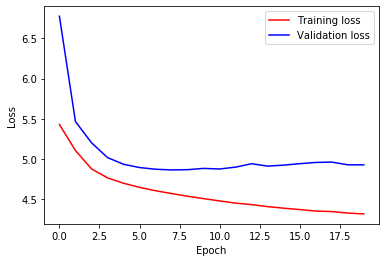

In [100]:
num_epoch = 20
num_of_train_batches = time_inputs_data_training.shape[0]
num_of_validation_batches = time_inputs_data_validation.shape[0]

training_loss = []
validation_loss = []

for epoch in range(num_epoch):      # loop over the dataset multiple times
    
    epoch_training_loss = 0.0
    epoch_validation_loss = 0.0
    
    
    musicNet.eval()
    for i in range(num_of_validation_batches):
        
        # Forward pass
        out_note, out_velocity, out_time = musicNet.forward(note_inputs_data_validation[i].cuda(), velocity_inputs_data_validation[i].cuda(), time_inputs_data_validation[i].cuda())
        
        note_crossEntropyLoss_perSequence = []

        for sequence, target in zip(out_note, note_targets_data_validation[i].cuda()):
            target = target.argmax(1)
            note_crossEntropyLoss_perSequence.append(crossEntropy(sequence, target))

        # Calculate separate losses
        note_crossEntropyLoss = sum(note_crossEntropyLoss_perSequence)/batched_sequences
        velocity_MSELoss = mse(out_velocity, velocity_targets_data_validation[i].cuda())
        time_MSELoss = mse(out_time, time_targets_data_validation[i].cuda())
        
        # Combine them into the final loss function
        loss = note_crossEntropyLoss + velocity_MSELoss + time_MSELoss
        
        # Update validation loss
        epoch_validation_loss += loss.detach().cpu().numpy()
    
    
    
    musicNet.train()
    for i in range (num_of_train_batches):
        
        # Forward pass
        out_note, out_velocity, out_time = musicNet.forward(note_inputs_data_training[i].cuda(), velocity_inputs_data_training[i].cuda(), time_inputs_data_training[i].cuda())
        
        note_crossEntropyLoss_perSequence = []

        for sequence, target in zip(out_note, note_targets_data_training[i].cuda()):
            target = target.argmax(1)
            note_crossEntropyLoss_perSequence.append(crossEntropy(sequence, target))

        # Calculate separate losses
        note_crossEntropyLoss = sum(note_crossEntropyLoss_perSequence)/batched_sequences
        velocity_MSELoss = mse(out_velocity, velocity_targets_data_training[i].cuda())
        time_MSELoss = mse(out_time, time_targets_data_training[i].cuda())
        
        # Combine them into the final loss function
        loss = note_crossEntropyLoss + velocity_MSELoss + time_MSELoss
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update training loss
        epoch_training_loss += loss.detach().cpu().numpy()
        
    training_loss.append(epoch_training_loss/num_of_train_batches)
    validation_loss.append(epoch_validation_loss/num_of_validation_batches)
    
    print(f'Epoch {epoch}, training loss: {training_loss[-1]}, validation loss: {validation_loss[-1]}')
    
# Plot training and validation loss
epoch = np.arange(len(training_loss))
plt.figure()
plt.plot(epoch, training_loss, 'r', label='Training loss',)
plt.plot(epoch, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

## Create and play sample song

In [105]:
from torch.distributions.categorical import Categorical
import math

In [106]:
note = note_inputs_data_training[0][0][5].reshape(1,1,-1)
velocity = velocity_inputs_data_training[0][0][5].reshape(1,1,-1)
time = time_inputs_data_training[0][0][5].reshape(1,1,-1)


# note.shape
previous_note, previous_velocity, previous_time = musicNet.forward(note.cuda(), velocity.cuda(), time.cuda())

In [108]:
def play_sample(input_note, input_velocity, input_time):
    
    previous_note = input_note
    previous_velocity = input_velocity
    previous_time = input_time
    
    sample = MidiFile()
    track = MidiTrack()
    sample.tracks.append(track)
    
    i = 0
    while i<=10000:

        next_note, next_velocity, next_time = musicNet.forward(previous_note.cuda(), previous_velocity.cuda(), previous_time.cuda())

        #NOTE
        probs = softmax(next_note)
        n = Categorical(probs.cpu()).sample().numpy()
        n = n.reshape(-1)

        #VELOCITY
        v_transformed = next_velocity.cpu().detach().numpy()
        v = velocity_inputs_scaler.inverse_transform(v_transformed)
        v = v.reshape(-1)

        #TIME
        t_transformed = next_time.cpu().detach().numpy()
        t = time_inputs_scaler.inverse_transform(t_transformed)
        t = t.reshape(-1)

        track.append(Message('note_on', note=int(n[0]), velocity=int(round(v[0])), time=float(t[0])))

        previous_note = next_note
    #     print (previous_note)
        previous_velocity = next_velocity
    #     print (previous_velocity)
        previous_time = next_time
    #     print (previous_time)
        i+=1
    
    play_midi(sample) # imported function from Midi_processing notebook

In [109]:
play_sample(previous_note, previous_velocity, previous_time)

<open output 'Microsoft GS Wavetable Synth 0' (RtMidi/WINDOWS_MM)>
{'type': 'note_on', 'time': 0.0002399341824154059, 'channel': 0, 'note': 56, 'velocity': 23}
{'type': 'note_on', 'time': 0.0004401791219909986, 'channel': 0, 'note': 53, 'velocity': 44}
{'type': 'note_on', 'time': 0.0017043105016152063, 'channel': 0, 'note': 72, 'velocity': 33}
{'type': 'note_on', 'time': 0.0005393266056974729, 'channel': 0, 'note': 48, 'velocity': 27}
{'type': 'note_on', 'time': 0.00203235720594724, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005906177684664726, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020076240102450053, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005728681882222493, 'channel': 0, 'note': 50, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018936364601055782, 'channel': 0, 'note': 62, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005632652590672175, 'channel': 0, 'note': 51, 'velocity': 31}
{'typ

{'type': 'note_on', 'time': 0.0006116631751259168, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017070099711418152, 'channel': 0, 'note': 69, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005665907636284828, 'channel': 0, 'note': 75, 'velocity': 32}
{'type': 'note_on', 'time': 0.002023270974556605, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.000615001159409682, 'channel': 0, 'note': 62, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019980118920405704, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005716345583399137, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018496414025624592, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005597395201524098, 'channel': 0, 'note': 64, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020398780703544616, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006110167130827903, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006378555049498876, 'channel': 0, 'note': 58, 'velocity': 26}
{'type': 'note_on', 'time': 0.002115031083424886, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006354779005050659, 'channel': 0, 'note': 72, 'velocity': 29}
{'type': 'note_on', 'time': 0.0019058705617984136, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005440310885508855, 'channel': 0, 'note': 63, 'velocity': 26}
{'type': 'note_on', 'time': 0.0019011236727237701, 'channel': 0, 'note': 62, 'velocity': 30}
{'type': 'note_on', 'time': 0.000489959679543972, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.0020654750367005664, 'channel': 0, 'note': 78, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005649461721380552, 'channel': 0, 'note': 60, 'velocity': 24}
{'type': 'note_on', 'time': 0.0019798453897237776, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005721664056181908, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006163387248913447, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.002031911164522171, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006575917825102807, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019629135727882384, 'channel': 0, 'note': 26, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006106888875365257, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016661687443653742, 'channel': 0, 'note': 62, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005725861216584841, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020072771857182186, 'channel': 0, 'note': 83, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006010656555493673, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020272521922985714, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006709280113379161, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0006147372225920359, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020060213903586067, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005827615037560463, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.00198294830818971, 'channel': 0, 'note': 59, 'velocity': 30}
{'type': 'note_on', 'time': 0.000582838679353396, 'channel': 0, 'note': 51, 'velocity': 25}
{'type': 'note_on', 'time': 0.002006078759829203, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005812364319960277, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017877986033757527, 'channel': 0, 'note': 62, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005639546240369479, 'channel': 0, 'note': 68, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020240946362415947, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006093924244244893, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0006020900482932726, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020321598897377648, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006723731756210327, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.001976386706034342, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005732420211037, 'channel': 0, 'note': 48, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016634450604518253, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.000561278872191906, 'channel': 0, 'note': 73, 'velocity': 32}
{'type': 'note_on', 'time': 0.002037210762500763, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006188683211803437, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020219488690296807, 'channel': 0, 'note': 26, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006195738911628723, 'channel': 0, 'note': 48,

{'type': 'note_on', 'time': 0.0006290188680092494, 'channel': 0, 'note': 77, 'velocity': 29}
{'type': 'note_on', 'time': 0.001829352726538976, 'channel': 0, 'note': 65, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005518787230054537, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020617451518774033, 'channel': 0, 'note': 56, 'velocity': 30}
{'type': 'note_on', 'time': 0.0007008116071422894, 'channel': 0, 'note': 59, 'velocity': 26}
{'type': 'note_on', 'time': 0.002103914072116216, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006237330536047617, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.001878706986705462, 'channel': 0, 'note': 70, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005467158431808153, 'channel': 0, 'note': 77, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020520975192387897, 'channel': 0, 'note': 60, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006332561994592348, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.00056434515863657, 'channel': 0, 'note': 25, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020313857744137446, 'channel': 0, 'note': 75, 'velocity': 29}
{'type': 'note_on', 'time': 0.000615535614391168, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020223218947649003, 'channel': 0, 'note': 75, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006174249574542046, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.002029789114991824, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006760782251755397, 'channel': 0, 'note': 55, 'velocity': 27}
{'type': 'note_on', 'time': 0.0021000340580940246, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.000621683212618033, 'channel': 0, 'note': 72, 'velocity': 29}
{'type': 'note_on', 'time': 0.0017763112982114157, 'channel': 0, 'note': 52, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005591966211795807, 'channel': 0, 'note': 60

{'type': 'note_on', 'time': 0.0007071657106280327, 'channel': 0, 'note': 60, 'velocity': 35}
{'type': 'note_on', 'time': 0.0011770227303107578, 'channel': 0, 'note': 77, 'velocity': 34}
{'type': 'note_on', 'time': 0.0006852681438128153, 'channel': 0, 'note': 65, 'velocity': 36}
{'type': 'note_on', 'time': 0.0019274840752283732, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.000714012235403061, 'channel': 0, 'note': 65, 'velocity': 30}
{'type': 'note_on', 'time': 0.0018684900055329005, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006896844754616419, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.001721769447127978, 'channel': 0, 'note': 59, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005831328531106313, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.001973836993177732, 'channel': 0, 'note': 85, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005927642186482747, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006466813385486603, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019907134274641672, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006352854892611503, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016773294657468796, 'channel': 0, 'note': 43, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005748815213640531, 'channel': 0, 'note': 62, 'velocity': 32}
{'type': 'note_on', 'time': 0.002001201113065084, 'channel': 0, 'note': 43, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006037235260009765, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.002034469693899155, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006647947554787, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019532414774099983, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005764453361431758, 'channel': 0, 'note': 65,

{'type': 'note_on', 'time': 0.000562154067059358, 'channel': 0, 'note': 67, 'velocity': 33}
{'type': 'note_on', 'time': 0.002034845451513926, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006172205011049906, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020312202473481496, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006551325942079226, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019693624228239058, 'channel': 0, 'note': 81, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006170947725574176, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.001665251205364863, 'channel': 0, 'note': 68, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005746797968943913, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019999656826257704, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005961978808045387, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0006469156593084336, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018052288641532263, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005419377237558364, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019361169387896856, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005937413622935613, 'channel': 0, 'note': 67, 'velocity': 31}
{'type': 'note_on', 'time': 0.001980867733558019, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005833741898337999, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018496451278527577, 'channel': 0, 'note': 36, 'velocity': 30}
{'type': 'note_on', 'time': 0.000546665924290816, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.002060927078127861, 'channel': 0, 'note': 64, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006907301023602486, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006497624019781748, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019830888758103054, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006294567137956619, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.00166552464167277, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005774398023883501, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019905142486095428, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005911453937490781, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018824753661950428, 'channel': 0, 'note': 60, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005401012177268663, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.002031510944167773, 'channel': 0, 'note': 80, 'velocity': 31}
{'type': 'note_on', 'time': 0.0006066360821326574, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006179056440790494, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.002006789048512777, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.000571749173104763, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016530004640420278, 'channel': 0, 'note': 41, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005640861267844836, 'channel': 0, 'note': 51, 'velocity': 33}
{'type': 'note_on', 'time': 0.00203202689687411, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006145936747392019, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.002032999570171038, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006593781833847364, 'channel': 0, 'note': 77, 'velocity': 28}
{'type': 'note_on', 'time': 0.001958086217443148, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006028274074196815, 'channel': 0, 'note': 55,

{'type': 'note_on', 'time': 0.000616007794936498, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.002032147472103437, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006584225843350093, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.001960790654023488, 'channel': 0, 'note': 49, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006085506329933802, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016663789749145508, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005718852082888285, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020096544176340103, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006026186669866244, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020323794335126875, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006738537301619848, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006097247203191122, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.001989543189605077, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.000563596561551094, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016770473370949428, 'channel': 0, 'note': 62, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005595376094182333, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020394917577505113, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006201543534795443, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.002017252892255783, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.000607990100979805, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.002007008592287699, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006084539617101351, 'channel': 0, 'note': 60

{'type': 'note_on', 'time': 0.0006334330886602402, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017459529141585033, 'channel': 0, 'note': 63, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005524462088942528, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020452731599410376, 'channel': 0, 'note': 42, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006169937551021576, 'channel': 0, 'note': 71, 'velocity': 27}
{'type': 'note_on', 'time': 0.002014420057336489, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005735181892911593, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.001653792957464854, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.000564994290471077, 'channel': 0, 'note': 47, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020303749789794285, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006131723523139954, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006044037019213041, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.00203518383204937, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006709067771832148, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.001961801325281461, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005763006086150805, 'channel': 0, 'note': 44, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016642971585194269, 'channel': 0, 'note': 81, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005620623007416726, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020357330640157064, 'channel': 0, 'note': 76, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006178455427289009, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.002022267257173856, 'channel': 0, 'note': 62, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006194200987617174, 'channel': 0, 'note': 53

{'type': 'note_on', 'time': 0.0005761681745449702, 'channel': 0, 'note': 64, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019962407648563387, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005984676380952199, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020150101433197656, 'channel': 0, 'note': 33, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006541868050893147, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019694921871026357, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005638691286245982, 'channel': 0, 'note': 51, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016536410897970198, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.000560972032447656, 'channel': 0, 'note': 60, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020365022122859956, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006187918285528818, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005474291741847992, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.002039159337679545, 'channel': 0, 'note': 47, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005731527383128802, 'channel': 0, 'note': 51, 'velocity': 30}
{'type': 'note_on', 'time': 0.002037117009361585, 'channel': 0, 'note': 35, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006555166095495224, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020623251795768736, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005935205146670342, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016752087821563085, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005678549408912658, 'channel': 0, 'note': 67, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020216912031173705, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006109275544683139, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.000566935787598292, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017514042556285858, 'channel': 0, 'note': 68, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005585890884200732, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020345259457826615, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006100668261448542, 'channel': 0, 'note': 77, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019900166740020116, 'channel': 0, 'note': 41, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005637569973866145, 'channel': 0, 'note': 58, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016812656074762344, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005594714234272639, 'channel': 0, 'note': 61, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020396155615647633, 'channel': 0, 'note': 45, 'velocity': 29}
{'type': 'note_on', 'time': 0.000620030735929807, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006189053257306417, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.002029380823175112, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006478378549218178, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019870555649201074, 'channel': 0, 'note': 74, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006347188105185826, 'channel': 0, 'note': 80, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016702227294445038, 'channel': 0, 'note': 72, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005769057199358941, 'channel': 0, 'note': 72, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019933205097913743, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005953710526227951, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019775913407405216, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.000589234506090482, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006720798090100288, 'channel': 0, 'note': 79, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019643341501553854, 'channel': 0, 'note': 43, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005761943136652311, 'channel': 0, 'note': 58, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016649343073368071, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005618849148352941, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020361186315615972, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006181188548604647, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.002021363377571106, 'channel': 0, 'note': 78, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006171082456906637, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020204126834869386, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006502408534288407, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0006462809319297473, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020401444286108016, 'channel': 0, 'note': 84, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005795954416195552, 'channel': 0, 'note': 73, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016620529194672903, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005645064637064933, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020314679791529973, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.000614763672153155, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020289393762747444, 'channel': 0, 'note': 76, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006375014781951904, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020122408866882326, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006565658375620842, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005729954068859418, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016636602580547331, 'channel': 0, 'note': 84, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005612200126051903, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.002037494753797849, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006190835187832515, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.002021605645616849, 'channel': 0, 'note': 78, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006187874202926954, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.002016358822584152, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006438635910550753, 'channel': 0, 'note': 58, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020827425022919973, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006063494210441907, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0005638731643557548, 'channel': 0, 'note': 53, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016875484337409337, 'channel': 0, 'note': 54, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005593204249938329, 'channel': 0, 'note': 49, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020397529006004333, 'channel': 0, 'note': 47, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006197448198994001, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.00201090673605601, 'channel': 0, 'note': 59, 'velocity': 28}
{'type': 'note_on', 'time': 0.000592698281009992, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019892589499553043, 'channel': 0, 'note': 59, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005850802486141522, 'channel': 0, 'note': 68, 'velocity': 25}
{'type': 'note_on', 'time': 0.0020142268389463426, 'channel': 0, 'note': 73, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005803795531392098, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006283147260546685, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016649571557839711, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005773895730574926, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019906080017487206, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005908846234281858, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018752605964740118, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005389046544830004, 'channel': 0, 'note': 53, 'velocity': 32}
{'type': 'note_on', 'time': 0.00203982541958491, 'channel': 0, 'note': 63, 'velocity': 31}
{'type': 'note_on', 'time': 0.0006086734433968862, 'channel': 0, 'note': 60, 'velocity': 26}
{'type': 'note_on', 'time': 0.002112420399983724, 'channel': 0, 'note': 85, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006282253190875054, 'channel': 0, 'note': 5

{'type': 'note_on', 'time': 0.0006055006136496862, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020356841385364534, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006693058336774508, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019557817528645196, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005783177291353544, 'channel': 0, 'note': 60, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016642520825068156, 'channel': 0, 'note': 0, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005627212425072988, 'channel': 0, 'note': 49, 'velocity': 32}
{'type': 'note_on', 'time': 0.00203442412118117, 'channel': 0, 'note': 81, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006169844418764114, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020233429968357086, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006216954439878464, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006260702386498452, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0018038742244243621, 'channel': 0, 'note': 66, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005555288245280584, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020522456616163254, 'channel': 0, 'note': 83, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006463292986154557, 'channel': 0, 'note': 63, 'velocity': 26}
{'type': 'note_on', 'time': 0.002093054602543513, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006173486510912577, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017373123516639074, 'channel': 0, 'note': 59, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005649704486131668, 'channel': 0, 'note': 51, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020269510646661122, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006116171677907308, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005595022812485695, 'channel': 0, 'note': 72, 'velocity': 32}
{'type': 'note_on', 'time': 0.002039432649811109, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006203463921944301, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.002020048846801122, 'channel': 0, 'note': 24, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006157580763101577, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020088163514931996, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.000621576172610124, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020568414280811944, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005824785679578781, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016831357032060623, 'channel': 0, 'note': 57, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005650344615181287, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0005634582911928494, 'channel': 0, 'note': 72, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016781518856684367, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005594524244467417, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020396200319131217, 'channel': 0, 'note': 73, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006201868876814842, 'channel': 0, 'note': 48, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020165120561917624, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006061274558305741, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020055849105119704, 'channel': 0, 'note': 0, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006047181785106659, 'channel': 0, 'note': 44, 'velocity': 26}
{'type': 'note_on', 'time': 0.0020495646943648658, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005801359191536903, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0006181921189030011, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020299098143974938, 'channel': 0, 'note': 52, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006487669423222541, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019856605678796766, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006310703232884407, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016676028569539388, 'channel': 0, 'note': 59, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005770814915498098, 'channel': 0, 'note': 39, 'velocity': 32}
{'type': 'note_on', 'time': 0.001991975804169973, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005930661534269651, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.001931114246447881, 'channel': 0, 'note': 59, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005555414905150731, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006151376912991206, 'channel': 0, 'note': 53, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020043905824422836, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005812736228108407, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019757008800903955, 'channel': 0, 'note': 61, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005818203091621399, 'channel': 0, 'note': 53, 'velocity': 25}
{'type': 'note_on', 'time': 0.001994382217526436, 'channel': 0, 'note': 29, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005818704143166542, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018288608640432357, 'channel': 0, 'note': 66, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005641461039582888, 'channel': 0, 'note': 68, 'velocity': 32}
{'type': 'note_on', 'time': 0.002030373861392339, 'channel': 0, 'note': 78, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006074802950024605, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0005453546221057574, 'channel': 0, 'note': 51, 'velocity': 32}
{'type': 'note_on', 'time': 0.002054688582817713, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006204078594843547, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.0019994683563709257, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005675513297319412, 'channel': 0, 'note': 70, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016532860696315765, 'channel': 0, 'note': 0, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005630593126018842, 'channel': 0, 'note': 61, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020335520307223002, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006159682447711627, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020321351786454517, 'channel': 0, 'note': 25, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006577566266059876, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006174338981509208, 'channel': 0, 'note': 70, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020300649106502534, 'channel': 0, 'note': 47, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006474480653802554, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.00198947104314963, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006318459908167521, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016731207569440206, 'channel': 0, 'note': 62, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005756339679161707, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019974321126937865, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005989978089928627, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.002018839120864868, 'channel': 0, 'note': 53, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006598385671774546, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0006577615315715472, 'channel': 0, 'note': 75, 'velocity': 28}
{'type': 'note_on', 'time': 0.00191444493830204, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.000597943551838398, 'channel': 0, 'note': 45, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016563826551040013, 'channel': 0, 'note': 66, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005713113894065221, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.00201145534714063, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006003409003218015, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020148360480864843, 'channel': 0, 'note': 72, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006542973220348358, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019708342850208284, 'channel': 0, 'note': 75, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005637768656015397, 'channel': 0, 'note': 56

{'type': 'note_on', 'time': 0.0006147779524326325, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020118126024802527, 'channel': 0, 'note': 62, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005923608938852946, 'channel': 0, 'note': 53, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020152715345223746, 'channel': 0, 'note': 65, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006077654659748077, 'channel': 0, 'note': 58, 'velocity': 26}
{'type': 'note_on', 'time': 0.002083326131105423, 'channel': 0, 'note': 70, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006010544175903002, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018137017885843912, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005567350114385287, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020474007974068324, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006291483839352926, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005644260595242183, 'channel': 0, 'note': 60, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020489942282438276, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006841664512952168, 'channel': 0, 'note': 56, 'velocity': 27}
{'type': 'note_on', 'time': 0.0021050892770290374, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006253280366460483, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.0018596388399600983, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005488953242699306, 'channel': 0, 'note': 51, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020620644092559813, 'channel': 0, 'note': 33, 'velocity': 30}
{'type': 'note_on', 'time': 0.0007056982566912968, 'channel': 0, 'note': 72, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021050192415714266, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006235725556810697, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0004980240017175674, 'channel': 0, 'note': 55, 'velocity': 30}
{'type': 'note_on', 'time': 0.0020608118424812953, 'channel': 0, 'note': 75, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005714926868677139, 'channel': 0, 'note': 69, 'velocity': 25}
{'type': 'note_on', 'time': 0.0019888666768868766, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005686884125073751, 'channel': 0, 'note': 44, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016569850345452626, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005638343592484792, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020321990052858986, 'channel': 0, 'note': 25, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006147176027297974, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020326713720957438, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006565985580285391, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0006282500301798185, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016649307062228521, 'channel': 0, 'note': 66, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005773849164446195, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.001990621288617452, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005908775453766187, 'channel': 0, 'note': 62, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018750452746947605, 'channel': 0, 'note': 65, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005388776461283366, 'channel': 0, 'note': 51, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020400483161211016, 'channel': 0, 'note': 60, 'velocity': 31}
{'type': 'note_on', 'time': 0.0006087942669788997, 'channel': 0, 'note': 65, 'velocity': 26}
{'type': 'note_on', 'time': 0.002112401028474172, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006282174959778786, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0005664102733135224, 'channel': 0, 'note': 70, 'velocity': 24}
{'type': 'note_on', 'time': 0.001981217165788015, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005712959915399552, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016707359502712885, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005645559479792913, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020302909115950266, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006138289968172709, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020298849791288375, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006400136897961299, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.002007166544596354, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006457619369029999, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0005692273999253908, 'channel': 0, 'note': 71, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017986954500277836, 'channel': 0, 'note': 57, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005581105748812357, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020355156312386194, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006086345762014389, 'channel': 0, 'note': 60, 'velocity': 27}
{'type': 'note_on', 'time': 0.0019884290794531505, 'channel': 0, 'note': 73, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005642399812738101, 'channel': 0, 'note': 48, 'velocity': 27}
{'type': 'note_on', 'time': 0.001656196266412735, 'channel': 0, 'note': 73, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005609842638174692, 'channel': 0, 'note': 48, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020366589228312175, 'channel': 0, 'note': 78, 'velocity': 29}
{'type': 'note_on', 'time': 0.000618793194492658, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0005591797952850659, 'channel': 0, 'note': 61, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020388659089803697, 'channel': 0, 'note': 47, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006176376715302468, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020022399723529814, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.000575949251651764, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019010696560144424, 'channel': 0, 'note': 77, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005693382893999418, 'channel': 0, 'note': 60, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020360834896564484, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.000605337197581927, 'channel': 0, 'note': 68, 'velocity': 27}
{'type': 'note_on', 'time': 0.001985089605053266, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005648550887902578, 'channel': 0, 'note': 5

{'type': 'note_on', 'time': 0.0005707204962770144, 'channel': 0, 'note': 53, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020135314514239627, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006049937879045804, 'channel': 0, 'note': 50, 'velocity': 28}
{'type': 'note_on', 'time': 0.002035553380846977, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006690789014101028, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019563217957814533, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005777415509025255, 'channel': 0, 'note': 71, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016639235119024912, 'channel': 0, 'note': 66, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005626060689489046, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020346352209647495, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006171029061079025, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005616044625639915, 'channel': 0, 'note': 57, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020357176661491396, 'channel': 0, 'note': 79, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006179766108592352, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.002030332759022713, 'channel': 0, 'note': 62, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006509030237793923, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019803815831740696, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.000626458910604318, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.001664497082432111, 'channel': 0, 'note': 83, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005771308516462644, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.001991425330440203, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005910805116097133, 'channel': 0, 'note': 5

{'type': 'note_on', 'time': 0.0006122350071867307, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019885610789060594, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005639266222715378, 'channel': 0, 'note': 70, 'velocity': 27}
{'type': 'note_on', 'time': 0.001689454292257627, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005592944100499154, 'channel': 0, 'note': 39, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020397336532672248, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006196037555734317, 'channel': 0, 'note': 53, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020098476360241573, 'channel': 0, 'note': 43, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005903777355949083, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.001983799288670222, 'channel': 0, 'note': 68, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005826540912191073, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006585650766889255, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019595070431629815, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006016109138727189, 'channel': 0, 'note': 77, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016656216233968733, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005699232220649719, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020161827405293783, 'channel': 0, 'note': 33, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006063691650827726, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.002035695066054662, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006643413255612055, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019500374794006348, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005815655613938967, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.000605176327129205, 'channel': 0, 'note': 67, 'velocity': 26}
{'type': 'note_on', 'time': 0.002043268581231435, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005775402610500653, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016887489706277846, 'channel': 0, 'note': 62, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005644652992486954, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.002027208978931109, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.000614323653280735, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.002017257114251455, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006037815163532893, 'channel': 0, 'note': 31, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020298664768536884, 'channel': 0, 'note': 76, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006479793538649877, 'channel': 0, 'note': 67,

{'type': 'note_on', 'time': 0.0005585305392742157, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.002034325400988261, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.000609666792054971, 'channel': 0, 'note': 56, 'velocity': 27}
{'type': 'note_on', 'time': 0.001989459991455078, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.000563571664194266, 'channel': 0, 'note': 84, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016763481001059214, 'channel': 0, 'note': 67, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005595507100224495, 'channel': 0, 'note': 67, 'velocity': 32}
{'type': 'note_on', 'time': 0.002039461707075437, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.000620167019466559, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020176836599906287, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006091255073746045, 'channel': 0, 'note': 58, 

{'type': 'note_on', 'time': 0.0006143370022376379, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020161379128694535, 'channel': 0, 'note': 79, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006343216324845949, 'channel': 0, 'note': 51, 'velocity': 27}
{'type': 'note_on', 'time': 0.002087018887201945, 'channel': 0, 'note': 78, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006084641441702843, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017331449935833612, 'channel': 0, 'note': 59, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005649820591012637, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.002025121326247851, 'channel': 0, 'note': 83, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006124562894304594, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019897876928249994, 'channel': 0, 'note': 42, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005644736190636953, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006144164130091667, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.001996076479554176, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005694712201754252, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018058815350135166, 'channel': 0, 'note': 78, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005580669268965722, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020362444221973417, 'channel': 0, 'note': 42, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006089265768726667, 'channel': 0, 'note': 60, 'velocity': 27}
{'type': 'note_on', 'time': 0.001989192267258962, 'channel': 0, 'note': 59, 'velocity': 28}
{'type': 'note_on', 'time': 0.000564698005716006, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016549949844678242, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.000561320719619592, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0005973562598228455, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016600970178842543, 'channel': 0, 'note': 54, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005700729166467984, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020172274361054104, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006053460141023, 'channel': 0, 'note': 73, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020351029932498934, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006736611947417259, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019681377957264583, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005761106188098589, 'channel': 0, 'note': 44, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016659809897343317, 'channel': 0, 'note': 66, 'velocity': 32}
{'type': 'note_on', 'time': 0.000561613030731678, 'channel': 0, 'note': 61

{'type': 'note_on', 'time': 0.0006189300368229548, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.002019526188572248, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006128278871377309, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020164744307597476, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006323195373018583, 'channel': 0, 'note': 46, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020886448522408805, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006095697482426961, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017440495391686758, 'channel': 0, 'note': 64, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005639548723896345, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020276838292678195, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006110501165191332, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0006720551600058873, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019901243348916372, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005724433188637098, 'channel': 0, 'note': 55, 'velocity': 27}
{'type': 'note_on', 'time': 0.001661952460805575, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005614927659432093, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.002036956325173378, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006187121694286664, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020235942055781683, 'channel': 0, 'note': 77, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006243425110975901, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020168542861938475, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006578135614593824, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006610256930192312, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019543714821338653, 'channel': 0, 'note': 37, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005992177873849868, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016663268208503724, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005689775571227074, 'channel': 0, 'note': 58, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020189537356297173, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006082431723674138, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.002034325897693634, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006543311600883801, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019614413380622865, 'channel': 0, 'note': 44, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005908817052841187, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005632421001791954, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.002034179617961248, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006173053756356239, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020169400920470554, 'channel': 0, 'note': 49, 'velocity': 29}
{'type': 'note_on', 'time': 0.000604857566456, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020220719277858736, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006312743450204531, 'channel': 0, 'note': 57, 'velocity': 26}
{'type': 'note_on', 'time': 0.0020996871093908946, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006203124299645424, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017991593728462856, 'channel': 0, 'note': 73, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005573221792777379, 'channel': 0, 'note': 72,

{'type': 'note_on', 'time': 0.0005582117165128389, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020372030635674794, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006094331542650859, 'channel': 0, 'note': 68, 'velocity': 27}
{'type': 'note_on', 'time': 0.001990586519241333, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005654338747262955, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016537629067897796, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005617848287026088, 'channel': 0, 'note': 48, 'velocity': 33}
{'type': 'note_on', 'time': 0.002035426596800486, 'channel': 0, 'note': 38, 'velocity': 29}
{'type': 'note_on', 'time': 0.000617733784019947, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.002030670642852783, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006525341421365737, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0006807483732700348, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019493665546178817, 'channel': 0, 'note': 71, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005981161569555601, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016806346674760183, 'channel': 0, 'note': 77, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005648426090677579, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020290214568376543, 'channel': 0, 'note': 92, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006159349034229914, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.002010184650619825, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005896757046381633, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020057722926139832, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005960190668702125, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005667509511113166, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.00165213147799174, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005623056242863337, 'channel': 0, 'note': 55, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020346272736787795, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006170121332009633, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.00203138900299867, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006557225560148557, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019678093492984773, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006155177329977353, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016654975712299346, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005741716052095095, 'channel': 0, 'note': 5

{'type': 'note_on', 'time': 0.0005686622733871142, 'channel': 0, 'note': 70, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016534822682539622, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.000561931977669398, 'channel': 0, 'note': 51, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020351255933443706, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006173605720202128, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.002030623828371366, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006508358443776766, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.001980848237872124, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006246188034613928, 'channel': 0, 'note': 41, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016646187752485276, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005766058340668679, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006398797035217285, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020015064626932146, 'channel': 0, 'note': 41, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006502229099472364, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0018348071724176406, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.000664554163813591, 'channel': 0, 'note': 63, 'velocity': 31}
{'type': 'note_on', 'time': 0.001608644922574361, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0006029604002833367, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019745385895172753, 'channel': 0, 'note': 77, 'velocity': 28}
{'type': 'note_on', 'time': 0.000542871467769146, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016480921457211176, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005552861218651136, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0005950861300031344, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018297263731559118, 'channel': 0, 'note': 57, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005226702739795049, 'channel': 0, 'note': 57, 'velocity': 31}
{'type': 'note_on', 'time': 0.002070186783870061, 'channel': 0, 'note': 63, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005846460039416949, 'channel': 0, 'note': 63, 'velocity': 25}
{'type': 'note_on', 'time': 0.0020125525693098704, 'channel': 0, 'note': 71, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005673532063762347, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.001657775416970253, 'channel': 0, 'note': 66, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005612647781769435, 'channel': 0, 'note': 51, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020369811604420344, 'channel': 0, 'note': 73, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006188968196511269, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006001453225811322, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016807797054449716, 'channel': 0, 'note': 66, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005654160554210345, 'channel': 0, 'note': 64, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020275092373291653, 'channel': 0, 'note': 50, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006154956916968028, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020111413051684696, 'channel': 0, 'note': 52, 'velocity': 28}
{'type': 'note_on', 'time': 0.000591445838411649, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020125739276409147, 'channel': 0, 'note': 97, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006037415936589241, 'channel': 0, 'note': 57, 'velocity': 26}
{'type': 'note_on', 'time': 0.0020755494634310404, 'channel': 0, 'note': 29, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005957850565512975, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0006534935906529427, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019702271868785224, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.000603538192808628, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016631511350472768, 'channel': 0, 'note': 54, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005711621915300687, 'channel': 0, 'note': 67, 'velocity': 32}
{'type': 'note_on', 'time': 0.002012403557697932, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006032189975182215, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.002032742897669474, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006745920206109682, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019821647554636003, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005739169816176096, 'channel': 0, 'note': 63

{'type': 'note_on', 'time': 0.0005587253098686536, 'channel': 0, 'note': 68, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020390046139558155, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.000616294393936793, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019987867524226505, 'channel': 0, 'note': 54, 'velocity': 28}
{'type': 'note_on', 'time': 0.000570986419916153, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018307240058978399, 'channel': 0, 'note': 65, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005587890123327573, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.002038318415482839, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006101013471682867, 'channel': 0, 'note': 48, 'velocity': 27}
{'type': 'note_on', 'time': 0.00199276568988959, 'channel': 0, 'note': 52, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005664803087711334, 'channel': 0, 'note': 44

{'type': 'note_on', 'time': 0.0005628903085986773, 'channel': 0, 'note': 49, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020246949046850205, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006117582942048709, 'channel': 0, 'note': 59, 'velocity': 28}
{'type': 'note_on', 'time': 0.001990165064732234, 'channel': 0, 'note': 62, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005644406502445539, 'channel': 0, 'note': 60, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016975749284029007, 'channel': 0, 'note': 59, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005592700093984604, 'channel': 0, 'note': 51, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020393713066975275, 'channel': 0, 'note': 26, 'velocity': 29}
{'type': 'note_on', 'time': 0.000618748739361763, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020057248572508493, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.000582023523747921, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006712965667247772, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019633253415425617, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005759730314215025, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016643911600112914, 'channel': 0, 'note': 81, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005619340265790621, 'channel': 0, 'note': 52, 'velocity': 32}
{'type': 'note_on', 'time': 0.002035986383756002, 'channel': 0, 'note': 72, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006180169060826301, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.002021982024113337, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.000618770532310009, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020206588009993236, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006546481202046076, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0005629563083251317, 'channel': 0, 'note': 51, 'velocity': 32}
{'type': 'note_on', 'time': 0.002034039671222369, 'channel': 0, 'note': 53, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006173746660351753, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020131338387727737, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005961833521723747, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020123033473889032, 'channel': 0, 'note': 58, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006061455234885216, 'channel': 0, 'note': 55, 'velocity': 26}
{'type': 'note_on', 'time': 0.0020754939566055932, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005950216203927994, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017727363854646682, 'channel': 0, 'note': 55, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005604991689324379, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005686616525053978, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016586000720659891, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005626015986005465, 'channel': 0, 'note': 79, 'velocity': 32}
{'type': 'note_on', 'time': 0.002034436911344528, 'channel': 0, 'note': 32, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006166597828269005, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020298796395460763, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006446559603015582, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.001996504763762156, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006371986741820971, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016996921350558598, 'channel': 0, 'note': 64, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005693325151999791, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0005686451370517413, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016549849261840183, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005619257067640622, 'channel': 0, 'note': 63, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020356041689713797, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006177482505639394, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020295236259698867, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006452922398845354, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019942983984947205, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006376843899488449, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016908716410398482, 'channel': 0, 'note': 66, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005713903034726778, 'channel': 0, 'note

{'type': 'note_on', 'time': 0.0005639885241786639, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.002024990071853002, 'channel': 0, 'note': 79, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006088883926471075, 'channel': 0, 'note': 57, 'velocity': 27}
{'type': 'note_on', 'time': 0.0019864687075217564, 'channel': 0, 'note': 33, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005631762246290843, 'channel': 0, 'note': 60, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016671277582645417, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.000559630865852038, 'channel': 0, 'note': 36, 'velocity': 32}
{'type': 'note_on', 'time': 0.002039064715305964, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006203206876913706, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020229446391264597, 'channel': 0, 'note': 45, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006244120498498281, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006109325836102168, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018658625582853954, 'channel': 0, 'note': 57, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005615440507729849, 'channel': 0, 'note': 66, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020497905711332957, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006293131659428279, 'channel': 0, 'note': 59, 'velocity': 26}
{'type': 'note_on', 'time': 0.002054484561085701, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005901951963702837, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016632971664269766, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005676186333100001, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020240468283494314, 'channel': 0, 'note': 50, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006102185075481732, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005644985785086949, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020250752568244934, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006144838407635689, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020103175193071365, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005892712622880935, 'channel': 0, 'note': 47, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020063679665327074, 'channel': 0, 'note': 59, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005966370304425557, 'channel': 0, 'note': 52, 'velocity': 26}
{'type': 'note_on', 'time': 0.0020580948640902836, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005878364046414693, 'channel': 0, 'note': 58, 'velocity': 27}
{'type': 'note_on', 'time': 0.001747508595387141, 'channel': 0, 'note': 58, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005627269546190898, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005649772783120473, 'channel': 0, 'note': 72, 'velocity': 27}
{'type': 'note_on', 'time': 0.0017103238652149836, 'channel': 0, 'note': 57, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005591405555605888, 'channel': 0, 'note': 53, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020384373764197033, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006168324500322342, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020003820459047954, 'channel': 0, 'note': 89, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005731308211882909, 'channel': 0, 'note': 44, 'velocity': 28}
{'type': 'note_on', 'time': 0.001865389198064804, 'channel': 0, 'note': 78, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005616933728257815, 'channel': 0, 'note': 73, 'velocity': 32}
{'type': 'note_on', 'time': 0.002040000011523565, 'channel': 0, 'note': 44, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006105467677116394, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006584403415520986, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019595589488744735, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006008361155788104, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016654487699270248, 'channel': 0, 'note': 78, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005697239190340042, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020168234904607138, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006067020197709402, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020356113711992897, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006630835433801015, 'channel': 0, 'note': 74, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019499202569325765, 'channel': 0, 'note': 52, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005826012541850408, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005741526062289873, 'channel': 0, 'note': 61, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016652374217907588, 'channel': 0, 'note': 69, 'velocity': 32}
{'type': 'note_on', 'time': 0.000561139111717542, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.002037555600206057, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.000619089292983214, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020199939608573914, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006142574672897657, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.002015947923064232, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.000633749800423781, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.002086556951204936, 'channel': 0, 'note': 42, 'velocity': 29}
{'type': 'note_on', 'time': 0.000607914167145888, 'channel': 0, 'note': 72, 

{'type': 'note_on', 'time': 0.000569283589720726, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020234535137812295, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006156199301282565, 'channel': 0, 'note': 52, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019958652555942535, 'channel': 0, 'note': 83, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005701184272766113, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018216963857412337, 'channel': 0, 'note': 59, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005582875261704127, 'channel': 0, 'note': 39, 'velocity': 32}
{'type': 'note_on', 'time': 0.00203775850435098, 'channel': 0, 'note': 78, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006097590550780297, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0019915421803792317, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005658850694696109, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0005832514415184657, 'channel': 0, 'note': 52, 'velocity': 32}
{'type': 'note_on', 'time': 0.00197347787519296, 'channel': 0, 'note': 26, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005923648675282796, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.001915574073791504, 'channel': 0, 'note': 54, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005523586645722389, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0019349552690982818, 'channel': 0, 'note': 66, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005299801006913186, 'channel': 0, 'note': 58, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020684721569220223, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.0007067169373234113, 'channel': 0, 'note': 55, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021026658515135447, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006223067020376523, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006141752004623413, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020328038682540257, 'channel': 0, 'note': 85, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006550373509526253, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019682329148054123, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006065224607785543, 'channel': 0, 'note': 70, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016642964134613674, 'channel': 0, 'note': 64, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005717642605304718, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.002010300507148107, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006023133173584938, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020309165120124817, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006739615773161252, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005969143783052762, 'channel': 0, 'note': 72, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019940913965304694, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006164854392409324, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.001972965275247892, 'channel': 0, 'note': 59, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005692031855384508, 'channel': 0, 'note': 60, 'velocity': 26}
{'type': 'note_on', 'time': 0.0017295611401398976, 'channel': 0, 'note': 64, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005167893754939239, 'channel': 0, 'note': 58, 'velocity': 31}
{'type': 'note_on', 'time': 0.002070069561402003, 'channel': 0, 'note': 76, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006453357016046842, 'channel': 0, 'note': 65, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021129424373308816, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006345069656769434, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006191224480668703, 'channel': 0, 'note': 41, 'velocity': 29}
{'type': 'note_on', 'time': 0.002029303709665934, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006481120983759562, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019861016422510146, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006347242121895154, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016689731429020563, 'channel': 0, 'note': 60, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005773212760686874, 'channel': 0, 'note': 51, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019917535285154976, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005938024570544561, 'channel': 0, 'note': 52, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019482608884572982, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005583998436729113, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.000635220172504584, 'channel': 0, 'note': 57, 'velocity': 26}
{'type': 'note_on', 'time': 0.002126553157965342, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006433056046565373, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.001979991669456164, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006174165134628614, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.0017009969800710677, 'channel': 0, 'note': 68, 'velocity': 31}
{'type': 'note_on', 'time': 0.000564602017402649, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020279870678981144, 'channel': 0, 'note': 83, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006144929677248002, 'channel': 0, 'note': 73, 'velocity': 28}
{'type': 'note_on', 'time': 0.001995039607087771, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005680466070771218, 'channel': 0, 'note': 48

{'type': 'note_on', 'time': 0.00054393969476223, 'channel': 0, 'note': 65, 'velocity': 30}
{'type': 'note_on', 'time': 0.001958918198943138, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005157717193166415, 'channel': 0, 'note': 57, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020709868520498277, 'channel': 0, 'note': 57, 'velocity': 30}
{'type': 'note_on', 'time': 0.0007167657216389974, 'channel': 0, 'note': 65, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021011456847190857, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.000620808390279611, 'channel': 0, 'note': 52, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018769955883423488, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005469251424074173, 'channel': 0, 'note': 70, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020521461963653566, 'channel': 0, 'note': 37, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006423744062582651, 'channel': 0, 'note': 55

{'type': 'note_on', 'time': 0.0005482170730829239, 'channel': 0, 'note': 51, 'velocity': 31}
{'type': 'note_on', 'time': 0.002058357372879982, 'channel': 0, 'note': 53, 'velocity': 30}
{'type': 'note_on', 'time': 0.00068309319516023, 'channel': 0, 'note': 55, 'velocity': 27}
{'type': 'note_on', 'time': 0.002113971362511317, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006322192649046579, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0019433980186780294, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005486136302351952, 'channel': 0, 'note': 63, 'velocity': 25}
{'type': 'note_on', 'time': 0.0018520976106325786, 'channel': 0, 'note': 61, 'velocity': 30}
{'type': 'note_on', 'time': 0.0004851467286547025, 'channel': 0, 'note': 51, 'velocity': 30}
{'type': 'note_on', 'time': 0.002069475253423055, 'channel': 0, 'note': 67, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005707208067178727, 'channel': 0, 'note': 56

{'type': 'note_on', 'time': 0.0006181463599205017, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020302942643562953, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.000651336337129275, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019791421790917715, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006262556339303653, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016642936815818151, 'channel': 0, 'note': 61, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005771964167555173, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019911886503299076, 'channel': 0, 'note': 45, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005908021703362465, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018726002424955368, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005386474231878916, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0006434253106514612, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0017560761421918868, 'channel': 0, 'note': 85, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005437000965078672, 'channel': 0, 'note': 72, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020622819662094115, 'channel': 0, 'note': 66, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006936978548765183, 'channel': 0, 'note': 55, 'velocity': 26}
{'type': 'note_on', 'time': 0.002105500300725301, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006255660206079483, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.001882234588265419, 'channel': 0, 'note': 55, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005463100348909696, 'channel': 0, 'note': 55, 'velocity': 30}
{'type': 'note_on', 'time': 0.002047840009133021, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006124577174584071, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0006164118647575378, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020318316916624704, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.00065701212733984, 'channel': 0, 'note': 54, 'velocity': 28}
{'type': 'note_on', 'time': 0.001964405427376429, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006116750960548718, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016659372796614964, 'channel': 0, 'note': 69, 'velocity': 32}
{'type': 'note_on', 'time': 0.000572935864329338, 'channel': 0, 'note': 68, 'velocity': 32}
{'type': 'note_on', 'time': 0.002006088693936666, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006002439185976982, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020232087622086207, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.000666310079395771, 'channel': 0, 'note': 65,

{'type': 'note_on', 'time': 0.0005618086705605189, 'channel': 0, 'note': 70, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020360096047321954, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.00061798095703125, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020241782069206236, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006253549829125405, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020187828689813615, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.000664910301566124, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020645882934331892, 'channel': 0, 'note': 72, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005945500607291857, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016671258956193924, 'channel': 0, 'note': 68, 'velocity': 32}
{'type': 'note_on', 'time': 0.000567644772430261, 'channel': 0, 'note': 5

{'type': 'note_on', 'time': 0.000619751401245594, 'channel': 0, 'note': 85, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020034114519755044, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005786527569095293, 'channel': 0, 'note': 45, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019247498363256454, 'channel': 0, 'note': 62, 'velocity': 30}
{'type': 'note_on', 'time': 0.000577751671274503, 'channel': 0, 'note': 57, 'velocity': 30}
{'type': 'note_on', 'time': 0.0020194864521423973, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006024645641446114, 'channel': 0, 'note': 49, 'velocity': 27}
{'type': 'note_on', 'time': 0.001985765745242437, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005646633605162302, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016898204882939657, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005590153237183888, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.000660285788277785, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019373654077450434, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006452892596522967, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016800757497549056, 'channel': 0, 'note': 59, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005789146448175113, 'channel': 0, 'note': 45, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019828996310631434, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005905632550517718, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018649329741795857, 'channel': 0, 'note': 53, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005368907625476519, 'channel': 0, 'note': 55, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020463728656371434, 'channel': 0, 'note': 64, 'velocity': 31}
{'type': 'note_on', 'time': 0.0006109923745195071, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005623978873093923, 'channel': 0, 'note': 56, 'velocity': 24}
{'type': 'note_on', 'time': 0.0019437352816263835, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005284846449891726, 'channel': 0, 'note': 60, 'velocity': 30}
{'type': 'note_on', 'time': 0.0015365277727444966, 'channel': 0, 'note': 66, 'velocity': 33}
{'type': 'note_on', 'time': 0.000582375501592954, 'channel': 0, 'note': 68, 'velocity': 35}
{'type': 'note_on', 'time': 0.0021484861771265667, 'channel': 0, 'note': 66, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006950089707970619, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019814422974983852, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005787405495842298, 'channel': 0, 'note': 55, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016823882857958476, 'channel': 0, 'note': 67, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005577734361092249, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005593784153461456, 'channel': 0, 'note': 48, 'velocity': 33}
{'type': 'note_on', 'time': 0.002039243777592977, 'channel': 0, 'note': 31, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006206924716631572, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020242323478062946, 'channel': 0, 'note': 39, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006292349348465602, 'channel': 0, 'note': 85, 'velocity': 28}
{'type': 'note_on', 'time': 0.002005853752295176, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006429862851897875, 'channel': 0, 'note': 45, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019789462288220725, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005641559138894082, 'channel': 0, 'note': 66, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016519601146380107, 'channel': 0, 'note': 26, 'velocity': 32}
{'type': 'note_on', 'time': 0.000561236838499705, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0005633595709999402, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016767735282580058, 'channel': 0, 'note': 54, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005594182759523392, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020396509518225987, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006202735006809234, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020172659307718275, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006081418444712957, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020063662280639014, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006076450149218242, 'channel': 0, 'note': 67, 'velocity': 26}
{'type': 'note_on', 'time': 0.002051623910665512, 'channel': 0, 'note': 66, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005803916603326798, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005504037563999494, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020627588033676147, 'channel': 0, 'note': 68, 'velocity': 30}
{'type': 'note_on', 'time': 0.000712945374349753, 'channel': 0, 'note': 53, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021010100841522216, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006206506242354711, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018700587252775827, 'channel': 0, 'note': 62, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005472709735234578, 'channel': 0, 'note': 41, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020557519048452376, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.000665945994357268, 'channel': 0, 'note': 70, 'velocity': 27}
{'type': 'note_on', 'time': 0.0021184042096138002, 'channel': 0, 'note': 75, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006364354863762856, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0005974638586242994, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.001671839008728663, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.000568220391869545, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020211884131034214, 'channel': 0, 'note': 68, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006105448429783185, 'channel': 0, 'note': 39, 'velocity': 28}
{'type': 'note_on', 'time': 0.002029591426253319, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006359982614715894, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.002012689287463824, 'channel': 0, 'note': 62, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006481776013970375, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019058257341384888, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.000614849105477333, 'channel': 0, 'note': 65

{'type': 'note_on', 'time': 0.0006561258186896642, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019644903639952343, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006020583833257357, 'channel': 0, 'note': 70, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016643362740675607, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005703932295242945, 'channel': 0, 'note': 65, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020148365447918573, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006051315615574519, 'channel': 0, 'note': 63, 'velocity': 28}
{'type': 'note_on', 'time': 0.002035520598292351, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006704281394680341, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.001958836739261945, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005773700152834257, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0006607494627436002, 'channel': 0, 'note': 60, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021043854455153146, 'channel': 0, 'note': 79, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006264783442020416, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0018273508797089259, 'channel': 0, 'note': 62, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005510306606690089, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020622745156288146, 'channel': 0, 'note': 67, 'velocity': 30}
{'type': 'note_on', 'time': 0.0007086602970957756, 'channel': 0, 'note': 59, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021020568907260894, 'channel': 0, 'note': 33, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006217746684948603, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018736121555169424, 'channel': 0, 'note': 33, 'velocity': 30}
{'type': 'note_on', 'time': 0.000546967051923275, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.0005660355091094971, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.001731965069969495, 'channel': 0, 'note': 33, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005588923891385396, 'channel': 0, 'note': 56, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020361473162968952, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006128514806429545, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.001993843913078308, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005659306421875954, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0017296796043713887, 'channel': 0, 'note': 83, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005589252337813378, 'channel': 0, 'note': 67, 'velocity': 32}
{'type': 'note_on', 'time': 0.002036387597521146, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006132558609048526, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0006147266055146853, 'channel': 0, 'note': 70, 'velocity': 28}
{'type': 'note_on', 'time': 0.002022267629702886, 'channel': 0, 'note': 71, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006166559954484304, 'channel': 0, 'note': 55, 'velocity': 28}
{'type': 'note_on', 'time': 0.002031064902742704, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006782041241725286, 'channel': 0, 'note': 68, 'velocity': 27}
{'type': 'note_on', 'time': 0.002100878208875656, 'channel': 0, 'note': 56, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006222739194830259, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0017858028411865234, 'channel': 0, 'note': 78, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005576702455679576, 'channel': 0, 'note': 49, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020456378658612567, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006249726439515749, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.000606140432258447, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.00203571654856205, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006649956107139587, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.001950366422533989, 'channel': 0, 'note': 59, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005809535582860311, 'channel': 0, 'note': 65, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016634957243998846, 'channel': 0, 'note': 64, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005637069543202718, 'channel': 0, 'note': 67, 'velocity': 32}
{'type': 'note_on', 'time': 0.002032334730029106, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006155916179219882, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020257497827212015, 'channel': 0, 'note': 31, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006276478990912438, 'channel': 0, 'note': 70

{'type': 'note_on', 'time': 0.0006256598358352979, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.001880534365773201, 'channel': 0, 'note': 65, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005464965477585792, 'channel': 0, 'note': 44, 'velocity': 30}
{'type': 'note_on', 'time': 0.002049979940056801, 'channel': 0, 'note': 48, 'velocity': 30}
{'type': 'note_on', 'time': 0.000620032474398613, 'channel': 0, 'note': 66, 'velocity': 26}
{'type': 'note_on', 'time': 0.002090703199307124, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006259862333536148, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.0019946955144405365, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006236194943388303, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.0017999209463596343, 'channel': 0, 'note': 53, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005300995583335558, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0006278585642576218, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0018655819197495778, 'channel': 0, 'note': 59, 'velocity': 30}
{'type': 'note_on', 'time': 0.000546843558549881, 'channel': 0, 'note': 56, 'velocity': 31}
{'type': 'note_on', 'time': 0.002056953062613805, 'channel': 0, 'note': 71, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006621545180678368, 'channel': 0, 'note': 67, 'velocity': 27}
{'type': 'note_on', 'time': 0.0021197070678075154, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.000637556736667951, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.001973329981168111, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006015411267677943, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.001807019238670667, 'channel': 0, 'note': 60, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005229232832789421, 'channel': 0, 'note': 48

{'type': 'note_on', 'time': 0.0006333417569597562, 'channel': 0, 'note': 67, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016713867584864299, 'channel': 0, 'note': 63, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005763310318191846, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.0019951578229665755, 'channel': 0, 'note': 0, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005969426905115446, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019995469599962236, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006276918575167656, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019806403666734695, 'channel': 0, 'note': 85, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005710783724983533, 'channel': 0, 'note': 58, 'velocity': 27}
{'type': 'note_on', 'time': 0.001996016502380371, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006057931731144587, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.001991567760705948, 'channel': 0, 'note': 26, 'velocity': 28}
{'type': 'note_on', 'time': 0.000565900964041551, 'channel': 0, 'note': 56, 'velocity': 27}
{'type': 'note_on', 'time': 0.0016532433529694874, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005620464682579041, 'channel': 0, 'note': 57, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020350330819686254, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006173759077986082, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020310370872418087, 'channel': 0, 'note': 70, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006540721282362938, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.001972182964285215, 'channel': 0, 'note': 0, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006191850950320562, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0016647645582755406, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.0016770190248886743, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005594807987411817, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.002040649205446243, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006199876467386881, 'channel': 0, 'note': 75, 'velocity': 29}
{'type': 'note_on', 'time': 0.002007050688068072, 'channel': 0, 'note': 78, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005851219718654951, 'channel': 0, 'note': 79, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019629556685686112, 'channel': 0, 'note': 60, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005811085303624471, 'channel': 0, 'note': 48, 'velocity': 26}
{'type': 'note_on', 'time': 0.0019811005642016728, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005846429616212845, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019388645887374878, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0016643772522608438, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005643679449955622, 'channel': 0, 'note': 63, 'velocity': 32}
{'type': 'note_on', 'time': 0.002031184732913971, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006145359327395757, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020290089150269827, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006375474234422048, 'channel': 0, 'note': 44, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020121611654758454, 'channel': 0, 'note': 64, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006562654549876848, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.001891971876223882, 'channel': 0, 'note': 74, 'velocity': 29}
{'type': 'note_on', 'time': 0.0007099340359369914, 'channel': 0, 'note': 51, 'velocity': 30}
{'type': 'note_on', 'time': 0.0016878840823968252, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0020324890812238056, 'channel': 0, 'note': 33, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006157103305061658, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020254230747620266, 'channel': 0, 'note': 26, 'velocity': 29}
{'type': 'note_on', 'time': 0.000626734954615434, 'channel': 0, 'note': 61, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020244630674521127, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006802370771765709, 'channel': 0, 'note': 63, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020573407411575316, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0005898869906862577, 'channel': 0, 'note': 48, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016676212350527446, 'channel': 0, 'note': 64, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005656479547421138, 'channel': 0, 'note': 60, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020287447919448216, 'channel': 0, 'note'

{'type': 'note_on', 'time': 0.001963697001338005, 'channel': 0, 'note': 57, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005647286772727967, 'channel': 0, 'note': 58, 'velocity': 26}
{'type': 'note_on', 'time': 0.0017155079791943233, 'channel': 0, 'note': 61, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005287854621807734, 'channel': 0, 'note': 49, 'velocity': 31}
{'type': 'note_on', 'time': 0.0020665583511193593, 'channel': 0, 'note': 66, 'velocity': 30}
{'type': 'note_on', 'time': 0.0007023494069774946, 'channel': 0, 'note': 67, 'velocity': 26}
{'type': 'note_on', 'time': 0.002104701101779938, 'channel': 0, 'note': 78, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006244878595074017, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018876829495032628, 'channel': 0, 'note': 62, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005465321863691012, 'channel': 0, 'note': 63, 'velocity': 30}
{'type': 'note_on', 'time': 0.0020442865788936615, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.0018279521415630977, 'channel': 0, 'note': 59, 'velocity': 30}
{'type': 'note_on', 'time': 0.0005553841590881347, 'channel': 0, 'note': 61, 'velocity': 32}
{'type': 'note_on', 'time': 0.002053067957361539, 'channel': 0, 'note': 55, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006500927110513051, 'channel': 0, 'note': 26, 'velocity': 26}
{'type': 'note_on', 'time': 0.0020970627665519714, 'channel': 0, 'note': 60, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006206649666031202, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.0017629376302162806, 'channel': 0, 'note': 47, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005615976949532827, 'channel': 0, 'note': 62, 'velocity': 32}
{'type': 'note_on', 'time': 0.002036017676194509, 'channel': 0, 'note': 59, 'velocity': 29}
{'type': 'note_on', 'time': 0.000611993856728077, 'channel': 0, 'note': 58, 'velocity': 27}
{'type': 'note_on', 'time': 0.0019875891506671906, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.0020697650810082755, 'channel': 0, 'note': 35, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006950639809171358, 'channel': 0, 'note': 60, 'velocity': 26}
{'type': 'note_on', 'time': 0.0021061278879642487, 'channel': 0, 'note': 97, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006260685622692108, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0018873992065588632, 'channel': 0, 'note': 59, 'velocity': 30}
{'type': 'note_on', 'time': 0.000546649843454361, 'channel': 0, 'note': 58, 'velocity': 30}
{'type': 'note_on', 'time': 0.002043376490473747, 'channel': 0, 'note': 56, 'velocity': 30}
{'type': 'note_on', 'time': 0.0006030911579728126, 'channel': 0, 'note': 56, 'velocity': 27}
{'type': 'note_on', 'time': 0.0020038754989703494, 'channel': 0, 'note': 74, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005883794898788134, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020195242017507554, 'channel': 0, 'note':

{'type': 'note_on', 'time': 0.00196332906683286, 'channel': 0, 'note': 62, 'velocity': 28}
{'type': 'note_on', 'time': 0.0006109721337755521, 'channel': 0, 'note': 51, 'velocity': 28}
{'type': 'note_on', 'time': 0.0016661050419012706, 'channel': 0, 'note': 59, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005726862077911695, 'channel': 0, 'note': 69, 'velocity': 32}
{'type': 'note_on', 'time': 0.002006938432653745, 'channel': 0, 'note': 50, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006008326386411984, 'channel': 0, 'note': 58, 'velocity': 28}
{'type': 'note_on', 'time': 0.002026208365956942, 'channel': 0, 'note': 36, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006698679799834887, 'channel': 0, 'note': 31, 'velocity': 28}
{'type': 'note_on', 'time': 0.001987423871954282, 'channel': 0, 'note': 64, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005713313197096189, 'channel': 0, 'note': 45, 'velocity': 27}
{'type': 'note_on', 'time': 0.001659411440292994, 'channel': 0, 'note': 64,

{'type': 'note_on', 'time': 0.001659464215238889, 'channel': 0, 'note': 57, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005617370208104451, 'channel': 0, 'note': 65, 'velocity': 33}
{'type': 'note_on', 'time': 0.0020356838901837665, 'channel': 0, 'note': 65, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006177515412370364, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020294513553380964, 'channel': 0, 'note': 54, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006449994320670764, 'channel': 0, 'note': 65, 'velocity': 28}
{'type': 'note_on', 'time': 0.001994863525032997, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006385599573453267, 'channel': 0, 'note': 58, 'velocity': 29}
{'type': 'note_on', 'time': 0.001694647967815399, 'channel': 0, 'note': 63, 'velocity': 31}
{'type': 'note_on', 'time': 0.0005703584601481755, 'channel': 0, 'note': 48, 'velocity': 32}
{'type': 'note_on', 'time': 0.002018597473700841, 'channel': 0, 'note': 6

{'type': 'note_on', 'time': 0.002020722875992457, 'channel': 0, 'note': 33, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006728040054440499, 'channel': 0, 'note': 73, 'velocity': 28}
{'type': 'note_on', 'time': 0.0019412143776814143, 'channel': 0, 'note': 67, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005916900932788849, 'channel': 0, 'note': 52, 'velocity': 28}
{'type': 'note_on', 'time': 0.001663577804962794, 'channel': 0, 'note': 71, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005677965159217517, 'channel': 0, 'note': 43, 'velocity': 32}
{'type': 'note_on', 'time': 0.0020225174725055695, 'channel': 0, 'note': 57, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006093692034482955, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020342754820982614, 'channel': 0, 'note': 66, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006548885256052017, 'channel': 0, 'note': 60, 'velocity': 28}
{'type': 'note_on', 'time': 0.001962239295244217, 'channel': 0, 'note': 

{'type': 'note_on', 'time': 0.002053127437829971, 'channel': 0, 'note': 61, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006159275770187377, 'channel': 0, 'note': 56, 'velocity': 27}
{'type': 'note_on', 'time': 0.0019886641452709834, 'channel': 0, 'note': 68, 'velocity': 28}
{'type': 'note_on', 'time': 0.0005634414032101631, 'channel': 0, 'note': 75, 'velocity': 27}
{'type': 'note_on', 'time': 0.001659717783331871, 'channel': 0, 'note': 29, 'velocity': 32}
{'type': 'note_on', 'time': 0.0005606576179464658, 'channel': 0, 'note': 69, 'velocity': 33}
{'type': 'note_on', 'time': 0.002037252237399419, 'channel': 0, 'note': 63, 'velocity': 29}
{'type': 'note_on', 'time': 0.0006191656614343325, 'channel': 0, 'note': 51, 'velocity': 29}
{'type': 'note_on', 'time': 0.0020278604080279667, 'channel': 0, 'note': 47, 'velocity': 29}
{'type': 'note_on', 'time': 0.000640635627011458, 'channel': 0, 'note': 56, 'velocity': 28}
{'type': 'note_on', 'time': 0.0020006092886130015, 'channel': 0, 'note': 3